In [3]:
from hamilton_ice.pipeline import get_func_args, object_io_nodes, build_pipeline
from hamilton_ice.io.beacon import beacon
from hamilton_ice.io.pandas import pandas_csv_source, pandas_msgpack
from hamilton_ice.io.dummy import dummy
from hamilton_ice.util.graphviz import dag_plot
import pandas as pd
import numpy as np
import random
import torch
from dataclasses import dataclass
from hamilton_ice.util.graphviz import dag_plot

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [14]:
class Diamond:
    @beacon
    def conf():
        return 0
    
    @dummy
    def foo(conf):
        for i in range(0,10):
            yield i
    
    @dummy
    def bar(foo):
        yield foo + 100
    
    @dummy
    def baz(foo):
        yield foo + 1000
        
    
    @dummy
    def bing(bar, baz):
        yield bar + baz

build_pipeline(Diamond)

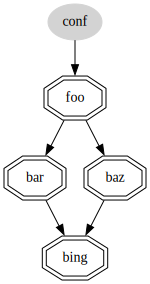

In [17]:
dag_plot(Diamond)

In [16]:
for result in Diamond.bing.generator():
    print(result)

1100
1102
1104
1106
1108
1110
1112
1114
1116
1118
